In [146]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

import importlib
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import tools
import math_functions as mf


In [147]:
######## Constants ########

A_sample = 1 # Fraction of light absorbed by sample
frac_PSII = 1 # Fraction of light absorbed by PSII
k_F = 1 # Rate constant for fluorescence
k_H = 1 # Rate constant for heat dissipation
k_P = 1 # Rate constant for photochemistry

I_k = 100 # Exponetial saturation constant for photochemistry
offset_fact = 3 # fraction of I_k 
amplitude_fact = 0.25 # fraction of I_k

frequency = 1 # Frequency of light modulation in Hz

nb_periods = 4 # Number of periods to simulate
points_per_period = 100 # Number of points per period

In [148]:
######## Functions ########

t = np.linspace(0, nb_periods/frequency, nb_periods * points_per_period) # Time vector
I = offset_fact * I_k + amplitude_fact * I_k * np.sin(2 * np.pi * frequency * t) # Irradiance vector
P = np.exp(- I / I_k) # Probability of photochemistry (fraction of open PSII centers)
phi_F = k_F/(k_F + k_H + k_P * P) # Fluorescence quantum yield
F = A_sample * frac_PSII * phi_F * I # Fluorescence vector 

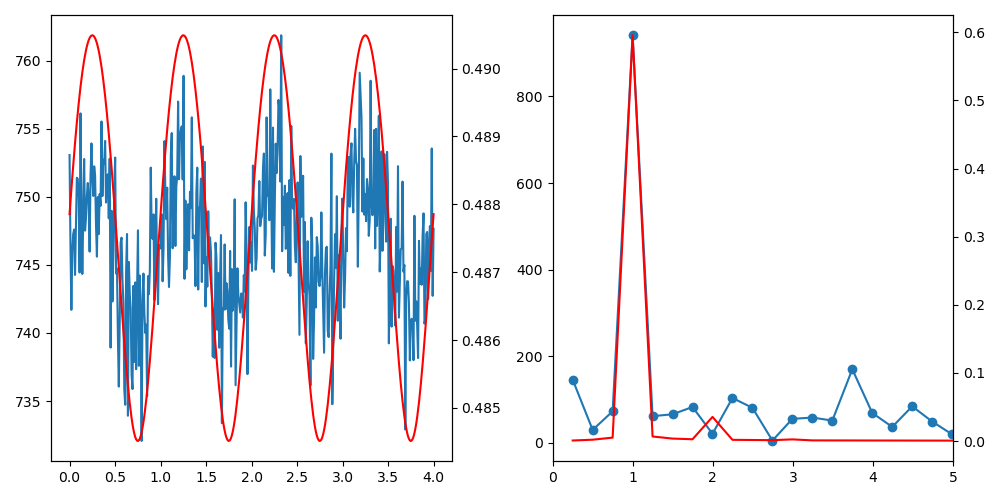

In [162]:
I2 = I + np.random.normal(0, 0.005*I_k*offset_fact, len(I))
I2 = I2/1531
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(t, F/I2)
ax2 = ax[0].twinx()
ax2.plot(t, phi_F, 'r')
F_fft, A_fft, P_fft = tools.FFT(t, F/I2)
ax[1].plot(F_fft, A_fft, 'o-')
F_fft, A_fft, P_fft = tools.FFT(t, phi_F)
ax3 = ax[1].twinx()
ax3.plot(F_fft, A_fft, 'r')
ax[1].set_xlim(0, 5* frequency)

fig.tight_layout()

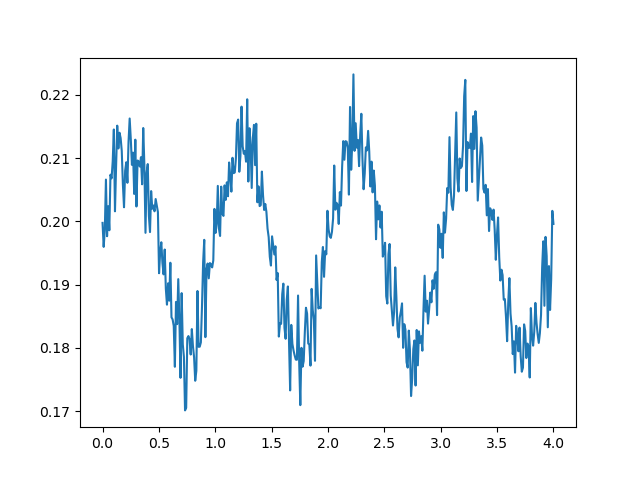

In [160]:
fig, ax = plt.subplots()
ax.plot(t, I2)

In [161]:
np.array([i + np.random.normal(0, 0.005/np.sqrt(i)) for i in I])

array([299.99985061, 301.57369791, 303.14084302, 304.6962764 ,
       306.23246649, 307.74383509, 309.22522984, 310.66962491,
       312.07177712, 313.42565385, 314.72680872, 315.96896124,
       317.14784889, 318.2593589 , 319.29802526, 320.25960964,
       321.14214325, 321.93959291, 322.65082853, 323.27180573,
       323.8006696 , 324.2353983 , 324.57357943, 324.81433883,
       324.95642814, 324.99967604, 324.94441141, 324.78989746,
       324.53605025, 324.18657357, 323.7391685 , 323.19918298,
       322.56703172, 321.84483992, 321.03575162, 320.1437929 ,
       319.17228281, 318.12446618, 317.0041503 , 315.81708986,
       314.56719387, 313.25914012, 311.89892003, 310.49111703,
       309.04177084, 307.55661471, 306.04159161, 304.50250592,
       302.94589215, 301.37731651, 299.80358057, 298.229973  ,
       296.66429463, 295.11069928, 293.57695122, 292.06905022,
       290.59232341, 289.15299386, 287.75620136, 286.40881712,
       285.11516179, 283.88050201, 282.70939444, 281.60